# tensorflow_hub 설치

In [3]:
!pip search tensorflow-hub

tensorflow-hub (0.7.0)                       - TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
hub (0.2.0.4)                                - Snark Hub
galsim-hub (0.0.1rc2)                        - Support for Tensorflow Hub modules in GalSim
hub-toolbox (2.5.2)                          - Hubness reduction and analysis tools
picopayments-hub (1.0.5)                     - Micropayment hub for counterparty assets.
tensorflow (2.0.0)                           - TensorFlow is an open source machine learning framework for everyone.
  INSTALLED: 2.0.0 (latest)
fsm-hub (2.0)                                - Finite State Machine storage hub
qpod-hub (2019.11.1)                         - A hub portal UI and proxy service for QPod.
docker-hub (2.2.0)                           - Access docker hub from your terminal
tensorflow-qndex (0.0.22)                    - tensorflow-qnd x tensorflow-extenteten
insteon-hub (0.7.

> 설치할 때는 이름에 - 가 들어가지만, 사용할 때는 \_ 로 바꿔서 이용한다.

In [5]:
!pip install tensorflow-hub==6

ERROR: Could not find a version that satisfies the requirement tensorflow-hub==6 (from versions: 0.1.0, 0.1.1, 0.2.0rc0, 0.2.0rc1, 0.2.0, 0.3.0, 0.4.0, 0.5.0, 0.6.0, 0.7.0)
ERROR: No matching distribution found for tensorflow-hub==6


> 버전에 아무 숫자나 넣어서 install 시키면 에러날 때 설치가능한 버전을 알려준다.  
(버전 확인하는 꼼수)

In [6]:
!pip install tensorflow-hub

In [9]:
!pip show tensorflow-hub

Name: tensorflow-hub
Version: 0.7.0
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\jinhyo\anaconda3\lib\site-packages
Requires: protobuf, six, numpy
Required-by: 


> pip show 명령어는 설치되어 있는 패키지의 버전 및 정보를 알려준다.  
만약 기존에 설치된 패키지가 구버전이라면 다음과 같이 업데이트 할 수 있다.
```python
!pip install tensorflow-hub -U
```

# Image Transfer Learning  
공식 튜토리얼 참고: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub?hl=ko

In [20]:
import tensorflow as tf
import tensorflow_hub as hub

In [13]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [44]:
IMAGE_SHAPE = (224, 224)

In [19]:
# channel last 로 만들기
# tuple append 

IMAGE_SHAPE + (3,)

(224, 224, 3)

In [58]:
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [59]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


여담
---

In [34]:
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_dim=3)
])

TypeError: ('Keyword argument not understood:', 'input_dim')

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=IMAGE_SHAPE+(3,))
])

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=3)
])

>input_dim은 명확하지 않다고 해서 더이상 사용되지 않는다.   
최신 기능에서는 deprecate 됨 (예: tensorflow_hub)  
하지만 예전에 만든 기능은 여전히 남아있어서 사용가능함.  

---

In [42]:
import numpy as np
from PIL import Image

In [46]:
grace_hopper = tf.keras.utils.get_file("image.jpg", 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)

> keras의 `utils.get_file` 함수 매우 잘 만들었다! 크로울링할때 써도 좋음 

In [47]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [60]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [79]:
# 예측한 클래스

predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

> `argmax`에서 slicing이나 axis를 제외해도 여기서는 문제가 없다.   
하지만 다차원일 경우에는 차이가 있으므로 예제의 코드가 정석이다.

In [80]:
np.argmax(result)

653

In [81]:
np.argmax(result[0])

653

In [82]:
np.argmax(result, axis=-1)

array([653], dtype=int64)

In [83]:
np.argmax(result[0], axis=-1)

653

# label 확인

In [66]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [70]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [71]:
# 예측한 클래스

imagenet_labels[653]

'military uniform'

In [78]:
# 2번째 높은 확률로 예측한 클래스 번호

np.argsort(result)[:,-2]

array([835], dtype=int64)

In [85]:
imagenet_labels[835]

'suit'

# 꽃

In [86]:
data_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)

228818944/228813984 [==============================] - 74s 0us/step


In [87]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [ ]:
# vars(image_data)

In [92]:
image_data.directory

'C:\\Users\\JINHYO\\.keras\\datasets\\flower_photos'

In [91]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [93]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [94]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'orange', 'daisy', 'pitcher', 'daisy', 'vase', 'cardoon',
       'daisy', 'buckeye', 'coral fungus', 'daisy', 'daisy', 'daisy',
       'daisy', 'rapeseed', 'greenhouse', 'bonnet', 'bee', 'breastplate',
       'feather boa', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'Bedlington terrier', 'bee', 'daisy', 'daisy', 'daisy',
       'picket fence', 'spider web'], dtype='<U30')

In [96]:
import matplotlib.pyplot as plt

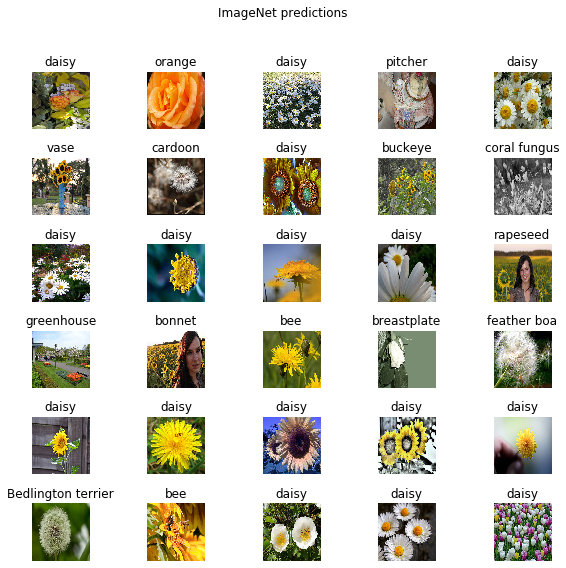

In [97]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

# model building : feature extraction

In [98]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [99]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [100]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [101]:
feature_extractor_layer.trainable = False

> -모든 레이어는 `trainable` 속성이 있다. 이 속성을 False로 하면 학습해도 파라미터 업데이트가 되지 않는다.
- GAN 할때 자주 사용하게 될 것이다.

In [103]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [104]:
predictions = model(image_batch)

In [105]:
predictions.shape

TensorShape([32, 5])

In [106]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [107]:
class CollectBatchStats(tf.keras.callbacks.Callback):
    def __init__(self):
        self.batch_losses = []
        self.batch_acc = []
  
    def on_train_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_acc.append(logs['acc'])
        self.model.reset_metrics()

> `callback` 테크닉을 이용해서 batch마다 loss와 accuracy를 측정하도록 만들었다.
- 기본 history는 epoch당 loss와 accuracy만 기록한다.

In [108]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

Epoch 1/2
115/115 [==============================] - 371s 3s/step - loss: 0.7141 - acc: 0.9375
Epoch 2/2
115/115 [==============================] - 398s 3s/step - loss: 0.3460 - acc: 0.9375


> - epoch를 많이 할 필요가 없다 -> feature_extraction_layer 가 `trainable=False`이므로 학습할 파라미터가 상대적으로 적다.
- 그래도 느리다. 왜냐하면 fully connected layer의 파라미터만 해도 엄청 많기 때문이다.

In [116]:
history.history

{'loss': [0.7137916248565799, 0.3463457168366669], 'acc': [0.9375, 0.9375]}

In [122]:
vars(batch_stats_callback).keys()

dict_keys(['batch_losses', 'batch_acc', 'model', 'params'])

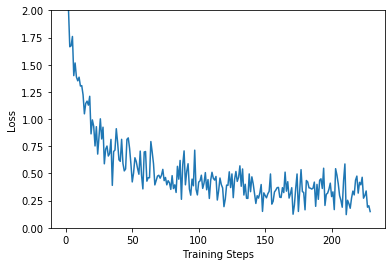

In [123]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

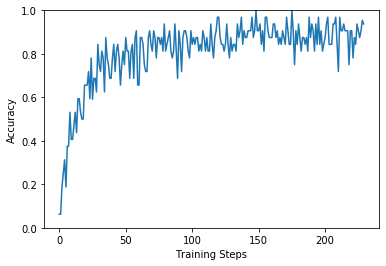

In [124]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [129]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [130]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [131]:
label_id = np.argmax(label_batch, axis=-1)

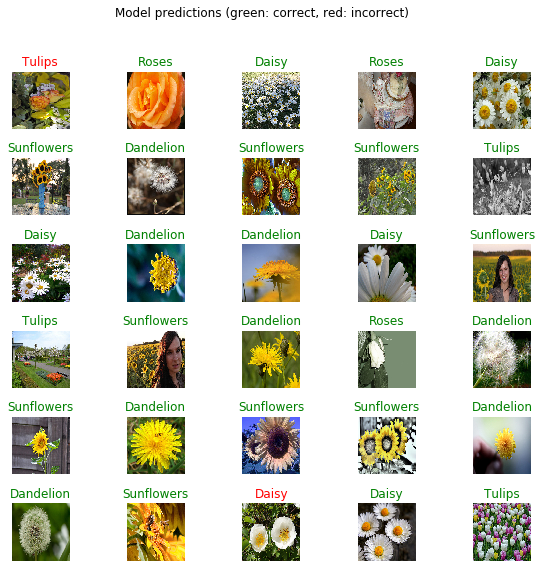

In [132]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

---

# Transfer Learing
- 기존에 학습되어 있는 모델의 지식(weight)을 전이(transfer)하여서 새로운 모델을 학습시키는 방법
- 학습 속도가 빨라지고, 모델의 성능도 좋은 편이다.

### 1. Feature Extraction
- 기존 모델의 head 부분(Fully connected 부분, Dense layer)만 제외하고 가져와서 특징을 뽑아내는 용도로 사용한다.
- trainable=False 로 설정하여서 weight를 고정시킨다.
- 기존 모델의 task가 새로운 task와 비슷할 경우에 좋다. 
    - 예를 들어서 고양이를 분류하던 모델을 강아지 분류하는 모델에 활용

### 2. Fine Tuning
- 기존 모델의 low level layer만 가져와서 이용하는 방법이다.
    - low level layer는 단순한 특징(직선, 대각선 등)만 추출하므로 다양한 학습데이터에 공통적으로 활용 가능하다.
    - 그러나 high level layer일수록 추상화 된 특징(눈, 얼굴)을 추출하므로 보편적으로 사용할 수 없다.
- 기존 모델의 task가 새로운 모델의 task가 상이할 경우에 좋다.

---

# tensorflow_hub  vs  keras.applications

- **tensorflow_hub: (장점/단점)**
    - 내부 구조를 알 수 없다. (자기가 만든 모델 비법을 노출하지 않을 수 있다. / 마음대로 튜닝할 수 없다.)
    - 누구나 공유할 수 있다. (자기가 만든 모델{기술력} 홍보할 수 있다. / 너무 많아서 뭘 쓸지 골라야한다.)
    - 고수가 활용하거나, 회사 차원에서 기술력 과시용으로 활용 가능하다.
    
- **keras.applications: (장점/단점)**
    - 레이어 단위까지 내부 구조를 뽑아서 쓸 수 있다. (필요한 layer만 뽑는 등 활용성 높다. / 모델 구조 노출되므로 보안 문제가 있다.) 
    - 유명한 모델 몇가지만 있다. (성능 입증된 모델만 있으므로 믿을만하다. / 다양성이 부족하다.)
    - 초보자가 이용하기 좋다.

In [109]:
# tensorflow_hub 모델

feature_extractor_layer

In [112]:
# 구조 알 수 없음

feature_extractor_layer.summary()

AttributeError: 'KerasLayer' object has no attribute 'summary'

In [113]:
# keras.application 모델

mobile = tf.keras.applications.MobileNet()
mobile

In [114]:
# 내부 구조 확인 가능

mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32